In [3]:
from helper.util import train_test_split_custom, count_classes, display_random_images
from helper.model import auto_extractor

import torch

# import torch.optim as optim # type: ignore
import yaml

from icecream import ic


with open('C:\\Users\\Sidewinders\\Desktop\\CODE\\UAV_Classification_repo\\src\\config.yaml', 'r') as file:
    config = yaml.safe_load(file)



general_config = config['general']


data_path = general_config['data_path']

model_name = general_config["model_name"]
SEED = general_config['seed']


torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

feature_extractor = auto_extractor(model_name)

# dataset = AudioDataset(data_path, feature_extractor)

train_dataset, test_dataset, inference_dataset = train_test_split_custom(data_path, 
                                                                         feature_extractor, 
                                                                         test_size=0.2, 
                                                                         seed=SEED, 
                                                                         inference_size=0.1, 
                                                                         training_transforms=False)

# Apply audio transformations to the training dataset
# transformed_train_dataset = apply_audio_transformations(train_dataset)

num_classes = len(train_dataset.get_classes()) 

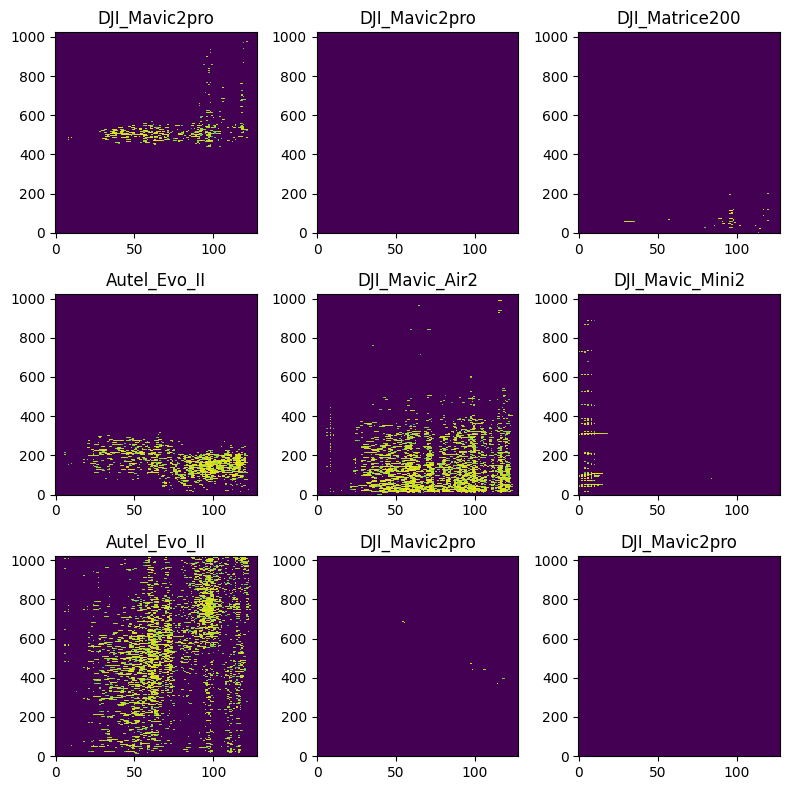

In [6]:
# ic(num_classes)

# ic(train_dataset.show_spectrogram(0))
# ic(train_dataset[0])
display_random_images(train_dataset)

